In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
df = pd.read_csv('/kaggle/input/engineering-graduate-salary-prediction/Engineering_graduate_salary.csv')
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [4]:
df.shape

(2998, 34)

In [5]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [7]:
df.drop(['ID', 'DOB', 'CollegeID','12graduation','10board',
        'CollegeState', 'CollegeCityID','CollegeCityTier'],axis=1,inplace=True)

In [8]:
df.head()

,Gender,10percentage,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,650,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,2014,440,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,2011,485,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,2013,675,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,2012,575,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [9]:
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   10percentage           2998 non-null   float64
 2   12percentage           2998 non-null   float64
 3   12board                2998 non-null   object 
 4   CollegeTier            2998 non-null   int64  
 5   Degree                 2998 non-null   object 
 6   Specialization         2998 non-null   object 
 7   collegeGPA             2998 non-null   float64
 8   GraduationYear         2998 non-null   int64  
 9   English                2998 non-null   int64  
 10  Logical                2998 non-null   int64  
 11  Quant                  2998 non-null   int64  
 12  Domain                 2998 non-null   float64
 13  ComputerProgramming    2998 non-null   int64  
 14  ElectronicsAndSemicon  2998 non-null   int64  
 15  Comp

In [11]:
df.describe()

,10percentage,12percentage,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,1.924616,71.509857,2011.939960,501.066378,500.431621,514.137759,0.508458,351.868579,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,0.264053,8.122462,36.780582,105.304512,87.299850,122.194955,0.463373,204.526227,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,1.000000,6.630000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,2.000000,66.530000,2012.000000,425.000000,441.250000,430.000000,0.342315,295.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,2.000000,71.800000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,2.000000,76.300000,2014.000000,570.000000,565.000000,595.000000,0.835612,495.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,2.000000,99.930000,2017.000000,875.000000,795.000000,900.000000,0.999910,804.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [12]:
df.head()

,Gender,10percentage,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,650,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,2014,440,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,2011,485,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,2013,675,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,2012,575,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [13]:
df.Degree.unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

In [14]:
df.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application',
       'computer science and technology', 'electrical engineering',
       'automobile/automotive engineering',
       'electronics and electrical engineering',
       'information science engineering', 'chemical engineering',
       'instrumentation engineering', 'electronics & instrumentation eng',
       'ceramic engineering', 'metallurgical engineering',
       'aeronautical engineering', 'electronics engineering',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation', 'civil engineering',
       'computer and communication engineering',
       'industrial & production engineering', 'computer networking',
       'other', '

In [15]:
df.Specialization.value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

In [16]:
specialization = df.Specialization.value_counts(ascending=False)
specialization

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

In [17]:
specialization_less10 = specialization[specialization<=10]
specialization_less10

Specialization
other                                      10
industrial & production engineering         8
chemical engineering                        7
applied electronics and instrumentation     5
mechanical and automation                   5
telecommunication engineering               4
automobile/automotive engineering           4
computer science and technology             4
aeronautical engineering                    3
instrumentation engineering                 3
electronics and computer engineering        3
mechatronics                                3
metallurgical engineering                   2
industrial engineering                      2
biomedical engineering                      2
information & communication technology      1
electronics                                 1
embedded systems technology                 1
industrial & management engineering         1
electrical and power engineering            1
computer and communication engineering      1
mechanical & produc

In [22]:
def handle_specialization(value):
    if value in specialization_less10:
        return 'other'
    else:
        return value
df['Specialization'] = df['Specialization'].apply(handle_specialization)
df['Specialization'].unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application', 'other',
       'electrical engineering', 'electronics and electrical engineering',
       'information science engineering',
       'electronics & instrumentation eng', 'electronics engineering',
       'electronics and instrumentation engineering', 'civil engineering'],
      dtype=object)

In [23]:
df['Specialization'].value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
other                                           76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: count, dtype: int64

In [24]:
df.head()

,Gender,10percentage,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,650,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,2014,440,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,2011,485,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,2013,675,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,2012,575,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


Working on GPA Column

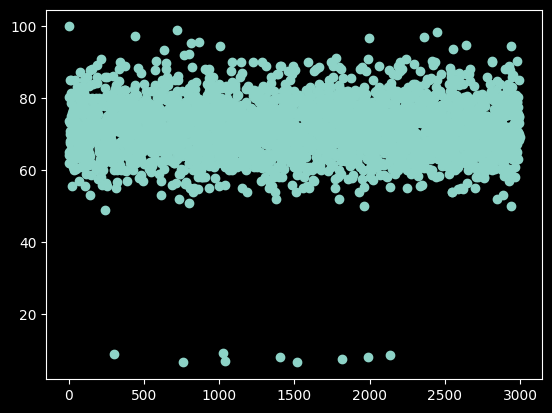

In [26]:
plt.scatter(df.index, df['collegeGPA'])

In [27]:
df = df[(df['collegeGPA']>40)]
df.shape

(2989, 26)

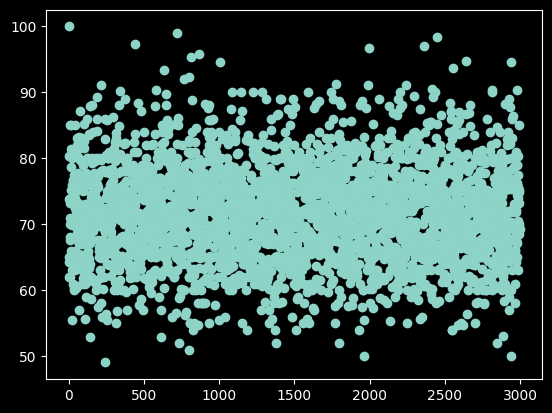

In [28]:
plt.scatter(df.index, df['collegeGPA'])

Visualization 

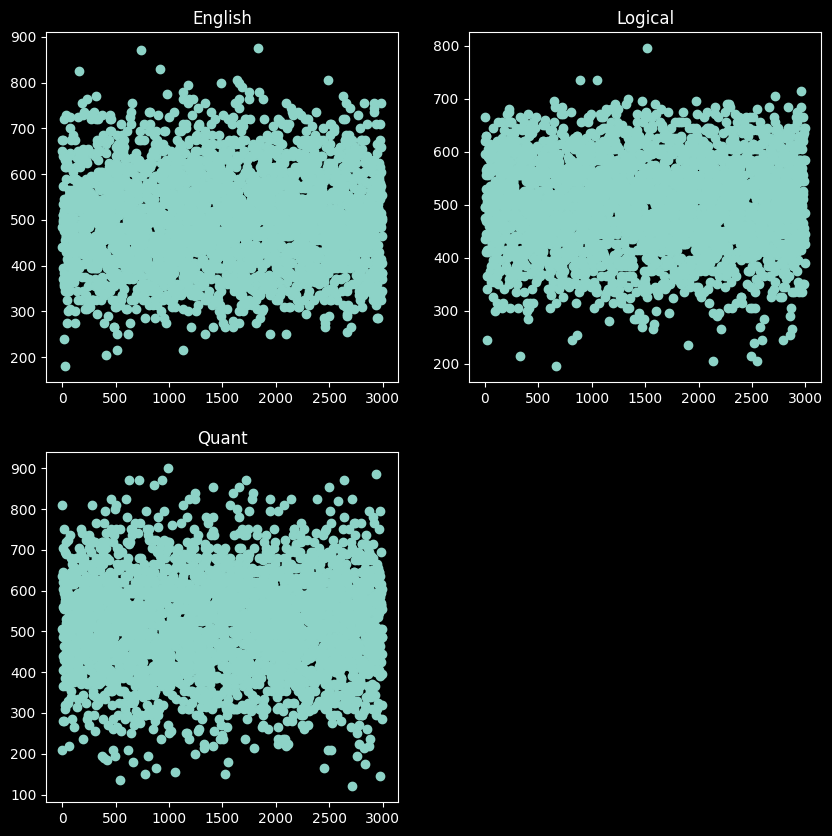

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(df.index, df.English)
plt.title('English')

plt.subplot(2,2,2)
plt.scatter(df.index, df.Logical)
plt.title('Logical')

plt.subplot(2,2,3)
plt.scatter(df.index, df.Quant)
plt.title('Quant')

plt.show()

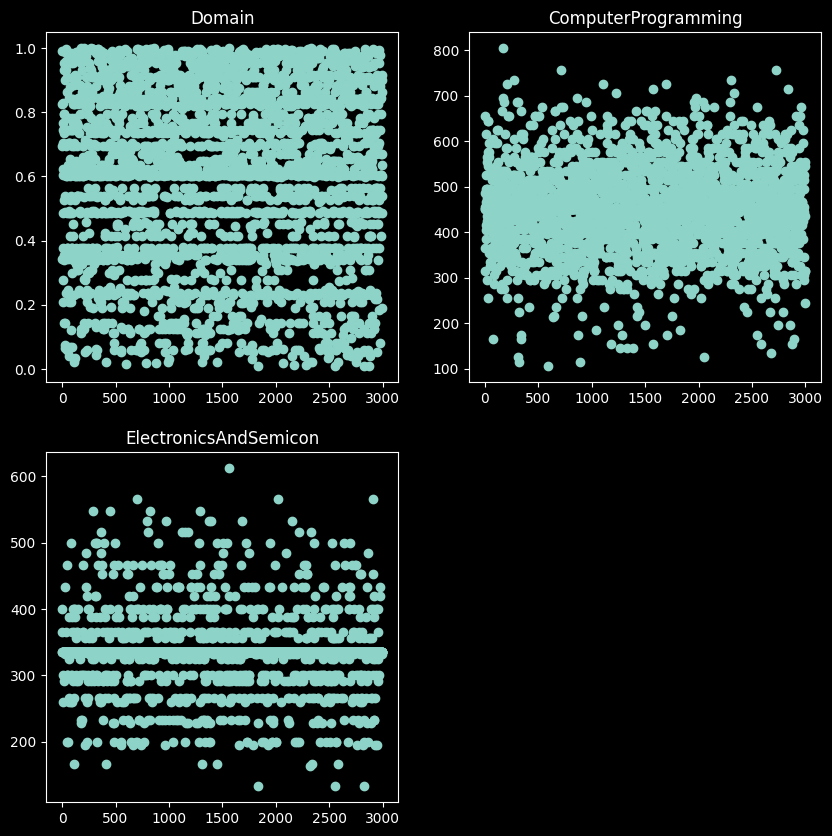

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(df.index, df.Domain)
plt.title('Domain')

plt.subplot(2,2,2)
plt.scatter(df.index, df.ComputerProgramming)
plt.title('ComputerProgramming')

plt.subplot(2,2,3)
plt.scatter(df.index, df.ElectronicsAndSemicon)
plt.title('ElectronicsAndSemicon')

plt.show()

In [31]:
df = df.replace(-1,np.nan)

In [32]:
nan_cols = [column for column in df.columns if df.isna().sum()[column]>0]
for column in nan_cols:
    df[column]  = df[column].fillna(df[column].mean())

In [34]:
df.head()

,Gender,10percentage,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,650,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,2014,440,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,2011,485,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,2013,675,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,2012,575,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


<Axes: xlabel='10percentage', ylabel='12percentage'>

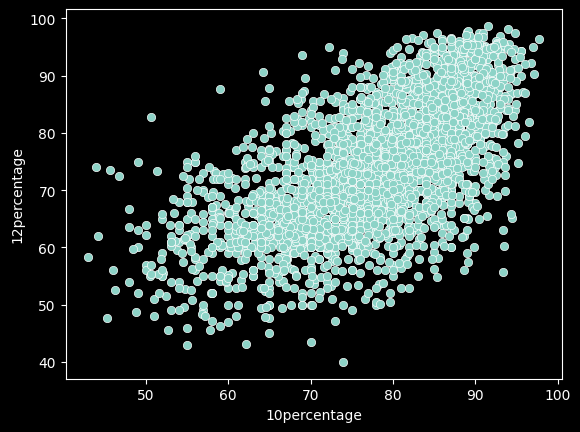

In [37]:
sns.scatterplot(data =df, x='10percentage', y='12percentage')

<Axes: xlabel='10percentage', ylabel='12percentage'>

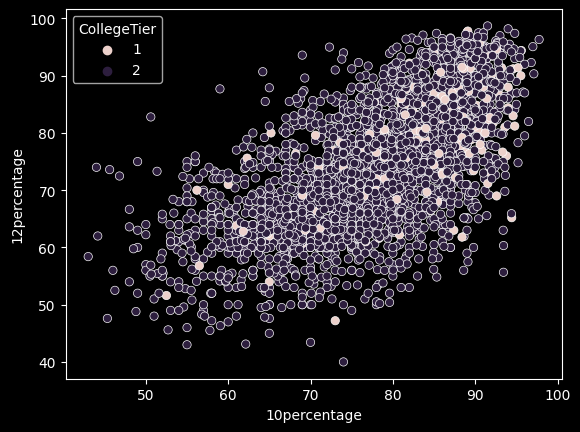

In [38]:
sns.scatterplot(data =df, x='10percentage', y='12percentage',hue=df.CollegeTier)

In [39]:
df.drop(['10percentage'], axis=1, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'instrumentation and control engineering'),
  Text(1, 0, 'computer science & engineering'),
  Text(2, 0, 'electronics & telecommunications'),
  Text(3, 0, 'biotechnology'),
  Text(4, 0, 'mechanical engineering'),
  Text(5, 0, 'information technology'),
  Text(6, 0, 'electronics and communication engineering'),
  Text(7, 0, 'computer engineering'),
  Text(8, 0, 'computer application'),
  Text(9, 0, 'other'),
  Text(10, 0, 'electrical engineering'),
  Text(11, 0, 'electronics and electrical engineering'),
  Text(12, 0, 'information science engineering'),
  Text(13, 0, 'electronics & instrumentation eng'),
  Text(14, 0, 'electronics engineering'),
  Text(15, 0, 'electronics and instrumentation engineering'),
  Text(16, 0, 'civil engineering')])

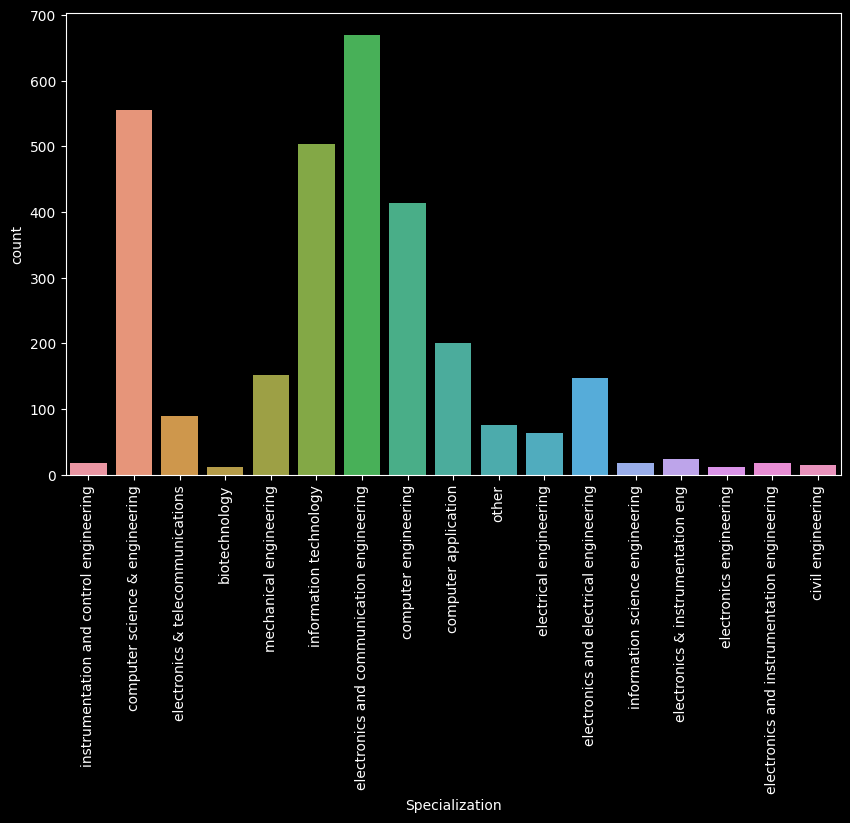

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Specialization')
plt.xticks(rotation=90)

In [44]:
df.head()

,Gender,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,650,665,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,2014,440,435,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,2011,485,475,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,2013,675,620,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,2012,575,495,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


<Axes: xlabel='collegeGPA', ylabel='Salary'>

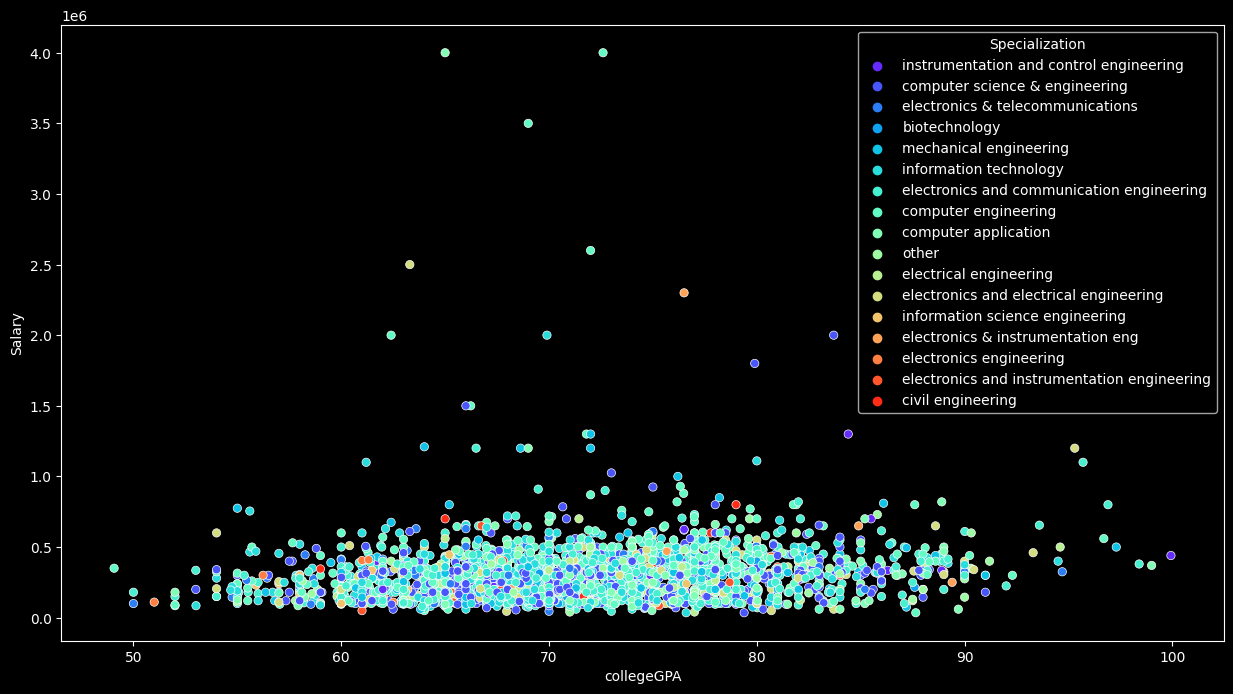

In [48]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='collegeGPA', y='Salary', hue='Specialization', palette='rainbow')


In [53]:
df.head()

,Gender,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,650,665,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,2014,440,435,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,2011,485,475,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,2013,675,620,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,2012,575,495,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2989 entries, 0 to 2997
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2989 non-null   object 
 1   12percentage           2989 non-null   float64
 2   12board                2989 non-null   object 
 3   CollegeTier            2989 non-null   int64  
 4   Degree                 2989 non-null   object 
 5   Specialization         2989 non-null   object 
 6   collegeGPA             2989 non-null   float64
 7   GraduationYear         2989 non-null   int64  
 8   English                2989 non-null   int64  
 9   Logical                2989 non-null   int64  
 10  Quant                  2989 non-null   int64  
 11  Domain                 2989 non-null   float64
 12  ComputerProgramming    2989 non-null   float64
 13  ElectronicsAndSemicon  2989 non-null   float64
 14  ComputerScience        2989 non-null   float64
 15  Mechanica

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Degree = le.fit_transform(df.Degree)
df.Specialization = le.fit_transform(df.Specialization)
df['12board'] = le.fit_transform(df['12board'])
df.head() 

,Gender,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,84.00,63,1,0,14,73.82,2013,650,665,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,64.50,63,2,0,4,65.00,2014,440,435,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,85.17,5,2,0,7,61.94,2011,485,475,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,86.00,63,1,0,4,80.40,2013,675,620,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,75.00,63,2,0,0,64.30,2012,575,495,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


XGBoost Model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor


In [65]:
x = df.drop('Salary', axis=1)
y = df['Salary']
sc = StandardScaler()
x = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True, random_state=0)


In [66]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [67]:
predictions = xgb.predict(X_test)

In [69]:
diff = y_test - predictions

/tmp/ipykernel_34/3454630195.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary', ylabel='Density'>

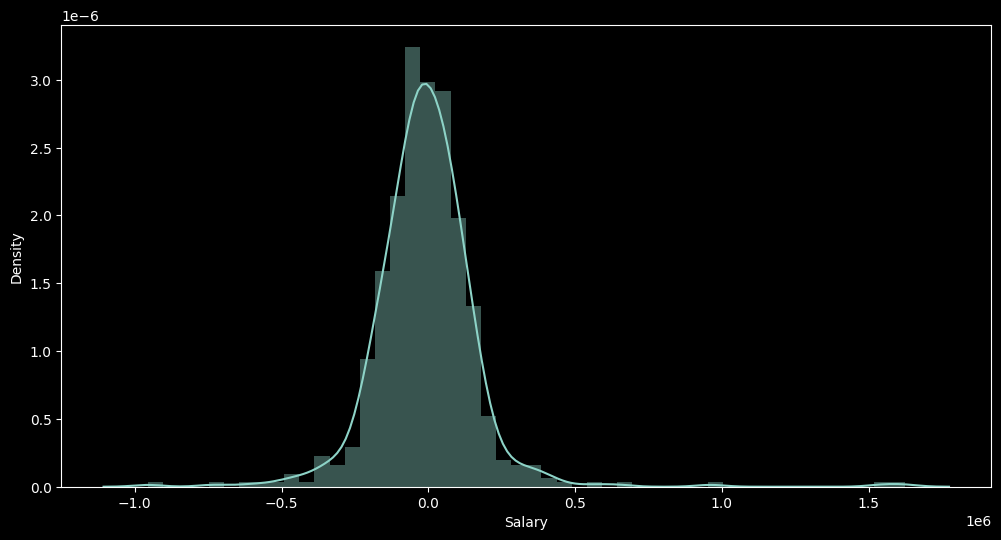

In [70]:
plt.figure(figsize=(12,6))
sns.distplot(diff)

R2 Score

In [72]:
xgb_r2_score = xgb.score(X_test, y_test)
print("XGBoost R2 Score Is: ", xgb_r2_score)

XGBoost R2 Score Is:  0.009132165348796129
